%matplotlib inline

import numpy as np
import math
import seaborn as sns
import pandas as pd

from scipy import stats
from scipy.stats import pearsonr
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

sns.set_context('poster')
sns.set(rc={'figure.figsize': (10, 6)})
sns.set_style('whitegrid')

## 1. Load data

In [469]:
# Read CSV
rawdata = pd.read_csv('housing.csv')

## 2. Clean data & data munging and wrangling

In [470]:
rawdata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [471]:
rawdata.shape

(1460, 81)

In [472]:
#check for null values in raw data
rawdata.isnull().sum().sort_values(ascending = False)[:20]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

In [473]:
#drop columns with null values of more than 100
rawdata.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage'],axis = 1, inplace = True)

In [474]:
rawdata.shape

(1460, 75)

In [475]:
rawdata.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'Enclos

C:\Users\bubuj\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


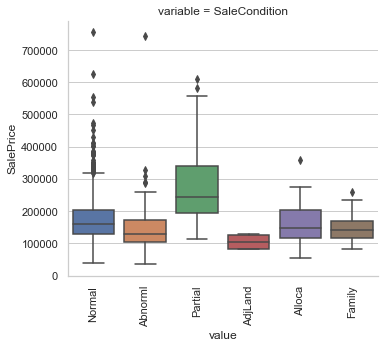

In [476]:
def boxplot(x,y,**kwargs):
            sns.boxplot(x=x,y=y)
            x = plt.xticks(rotation=90)

p = pd.melt(rawdata, id_vars='SalePrice', value_vars='SaleCondition')
g = sns.FacetGrid (p, col='variable', col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, 'value','SalePrice')
g

plt.savefig('Sale Condition')

In [477]:
housing = rawdata[rawdata['SaleCondition'] == 'Normal']

In [478]:
housing.shape

(1198, 75)

In [479]:
#Check for null values
housing.isnull().sum().sort_values(ascending = False)[:15]

GarageType      61
GarageYrBlt     61
GarageFinish    61
GarageCond      61
GarageQual      61
BsmtExposure    33
BsmtFinType2    33
BsmtFinType1    32
BsmtCond        32
BsmtQual        32
MasVnrType       4
MasVnrArea       4
Electrical       1
RoofMatl         0
RoofStyle        0
dtype: int64

In [480]:
#check why 61 garage-related variables are null
housing[pd.isna(housing['GarageType'])].filter(items = ['GarageCars', 'GarageArea', 'GarageType','GarageYrBlt','GarageFinish','GarageCond','GarageQual']).T

,78,89,99,108,125,127,140,148,155,163,...,1218,1257,1283,1323,1325,1326,1337,1349,1407,1450
GarageCars,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GarageArea,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GarageType,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GarageYrBlt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GarageFinish,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GarageCond,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GarageQual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [481]:
#check basement-related variables are null
housing[pd.isna(housing['BsmtExposure'])].filter(items = ['TotalBsmtSF', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2','BsmtCond','BsmtQual']).T    

,17,90,156,182,259,342,362,371,392,520,...,1035,1045,1048,1090,1179,1216,1218,1232,1321,1412
TotalBsmtSF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BsmtExposure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtFinType1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtFinType2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtCond,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtQual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [482]:
#fill the NaN as N/A as these represent not applicable categories
housing.fillna('N/A')
housing.head(2)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500


In [483]:
housing.shape

(1198, 75)

In [484]:
housing['SalePrice'].describe()

count      1198.000000
mean     175202.219533
std       69713.636280
min       39300.000000
25%      130000.000000
50%      160000.000000
75%      205000.000000
max      755000.000000
Name: SalePrice, dtype: float64

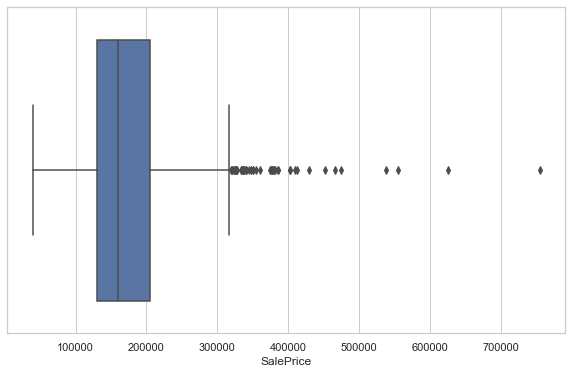

In [485]:
sns.boxplot(x=housing['SalePrice'])

Skewness is 0.11031061040673551


C:\Users\bubuj\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


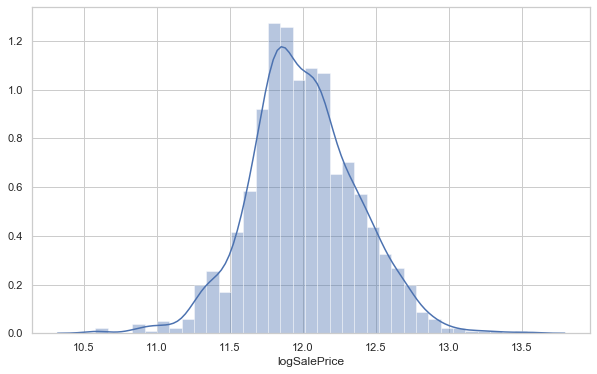

In [486]:
#log transforming the variable to fix the skewness
housing['logSalePrice'] = np.log(housing['SalePrice'])
print ('Skewness is', housing['logSalePrice'].skew())
sns.distplot(housing['logSalePrice'])

In [487]:
IQR = 205000 + 1.5 * (205000-130000)
print(IQR)

317500.0


In [488]:
OutlierData = housing[housing['SalePrice'] > 317500 ]
housing.drop(OutlierData.index, inplace=True, axis=0)

C:\Users\bubuj\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [489]:
housing.shape

(1150, 76)

The skewness of SalePrice is 0.6110845035921171


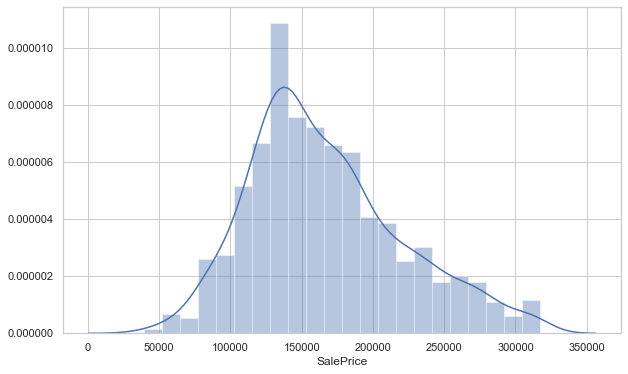

In [490]:
#visualising sale price
sns.distplot(housing['SalePrice'])
print ("The skewness of SalePrice is {}".format(housing['SalePrice'].skew()))

In [491]:
housing['MSZoning'].value_counts()

RL         910
RM         187
FV          38
RH          11
C (all)      4
Name: MSZoning, dtype: int64

In [492]:
Commercialprop = housing[housing['MSZoning'] == 'C (all)' ]
housing.drop(Commercialprop.index, inplace=True, axis=0)

In [493]:
housing.shape

(1146, 76)

## 3. Select features

In [494]:
#separate variables into new data frames
numeric_data = housing.select_dtypes(include=[np.number])
cat_data = housing.select_dtypes(exclude=[np.number])
print ("There are {} numeric and {} categorical columns in the housing data".format(numeric_data.shape[1],cat_data.shape[1]))

There are 38 numeric and 38 categorical columns in the housing data


In [495]:
numeric_data.head(5)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,logSalePrice
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,61,0,0,0,0,0,2,2008,208500,12.247694
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,0,0,5,2007,181500,12.109011
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,42,0,0,0,0,0,9,2008,223500,12.317167
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,84,0,0,0,0,0,12,2008,250000,12.429216
5,6,50,14115,5,5,1993,1995,0.0,732,0,...,30,0,320,0,0,700,10,2009,143000,11.870600


In [496]:
del numeric_data['Id']

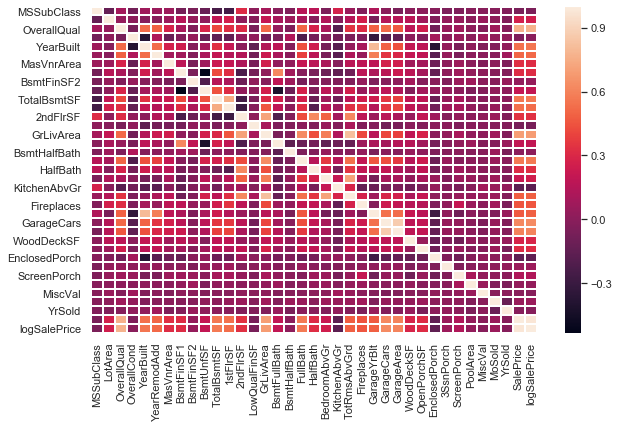

In [497]:
#correlation plot
corr = numeric_data.corr()
sns.heatmap(corr, linewidths = 1)

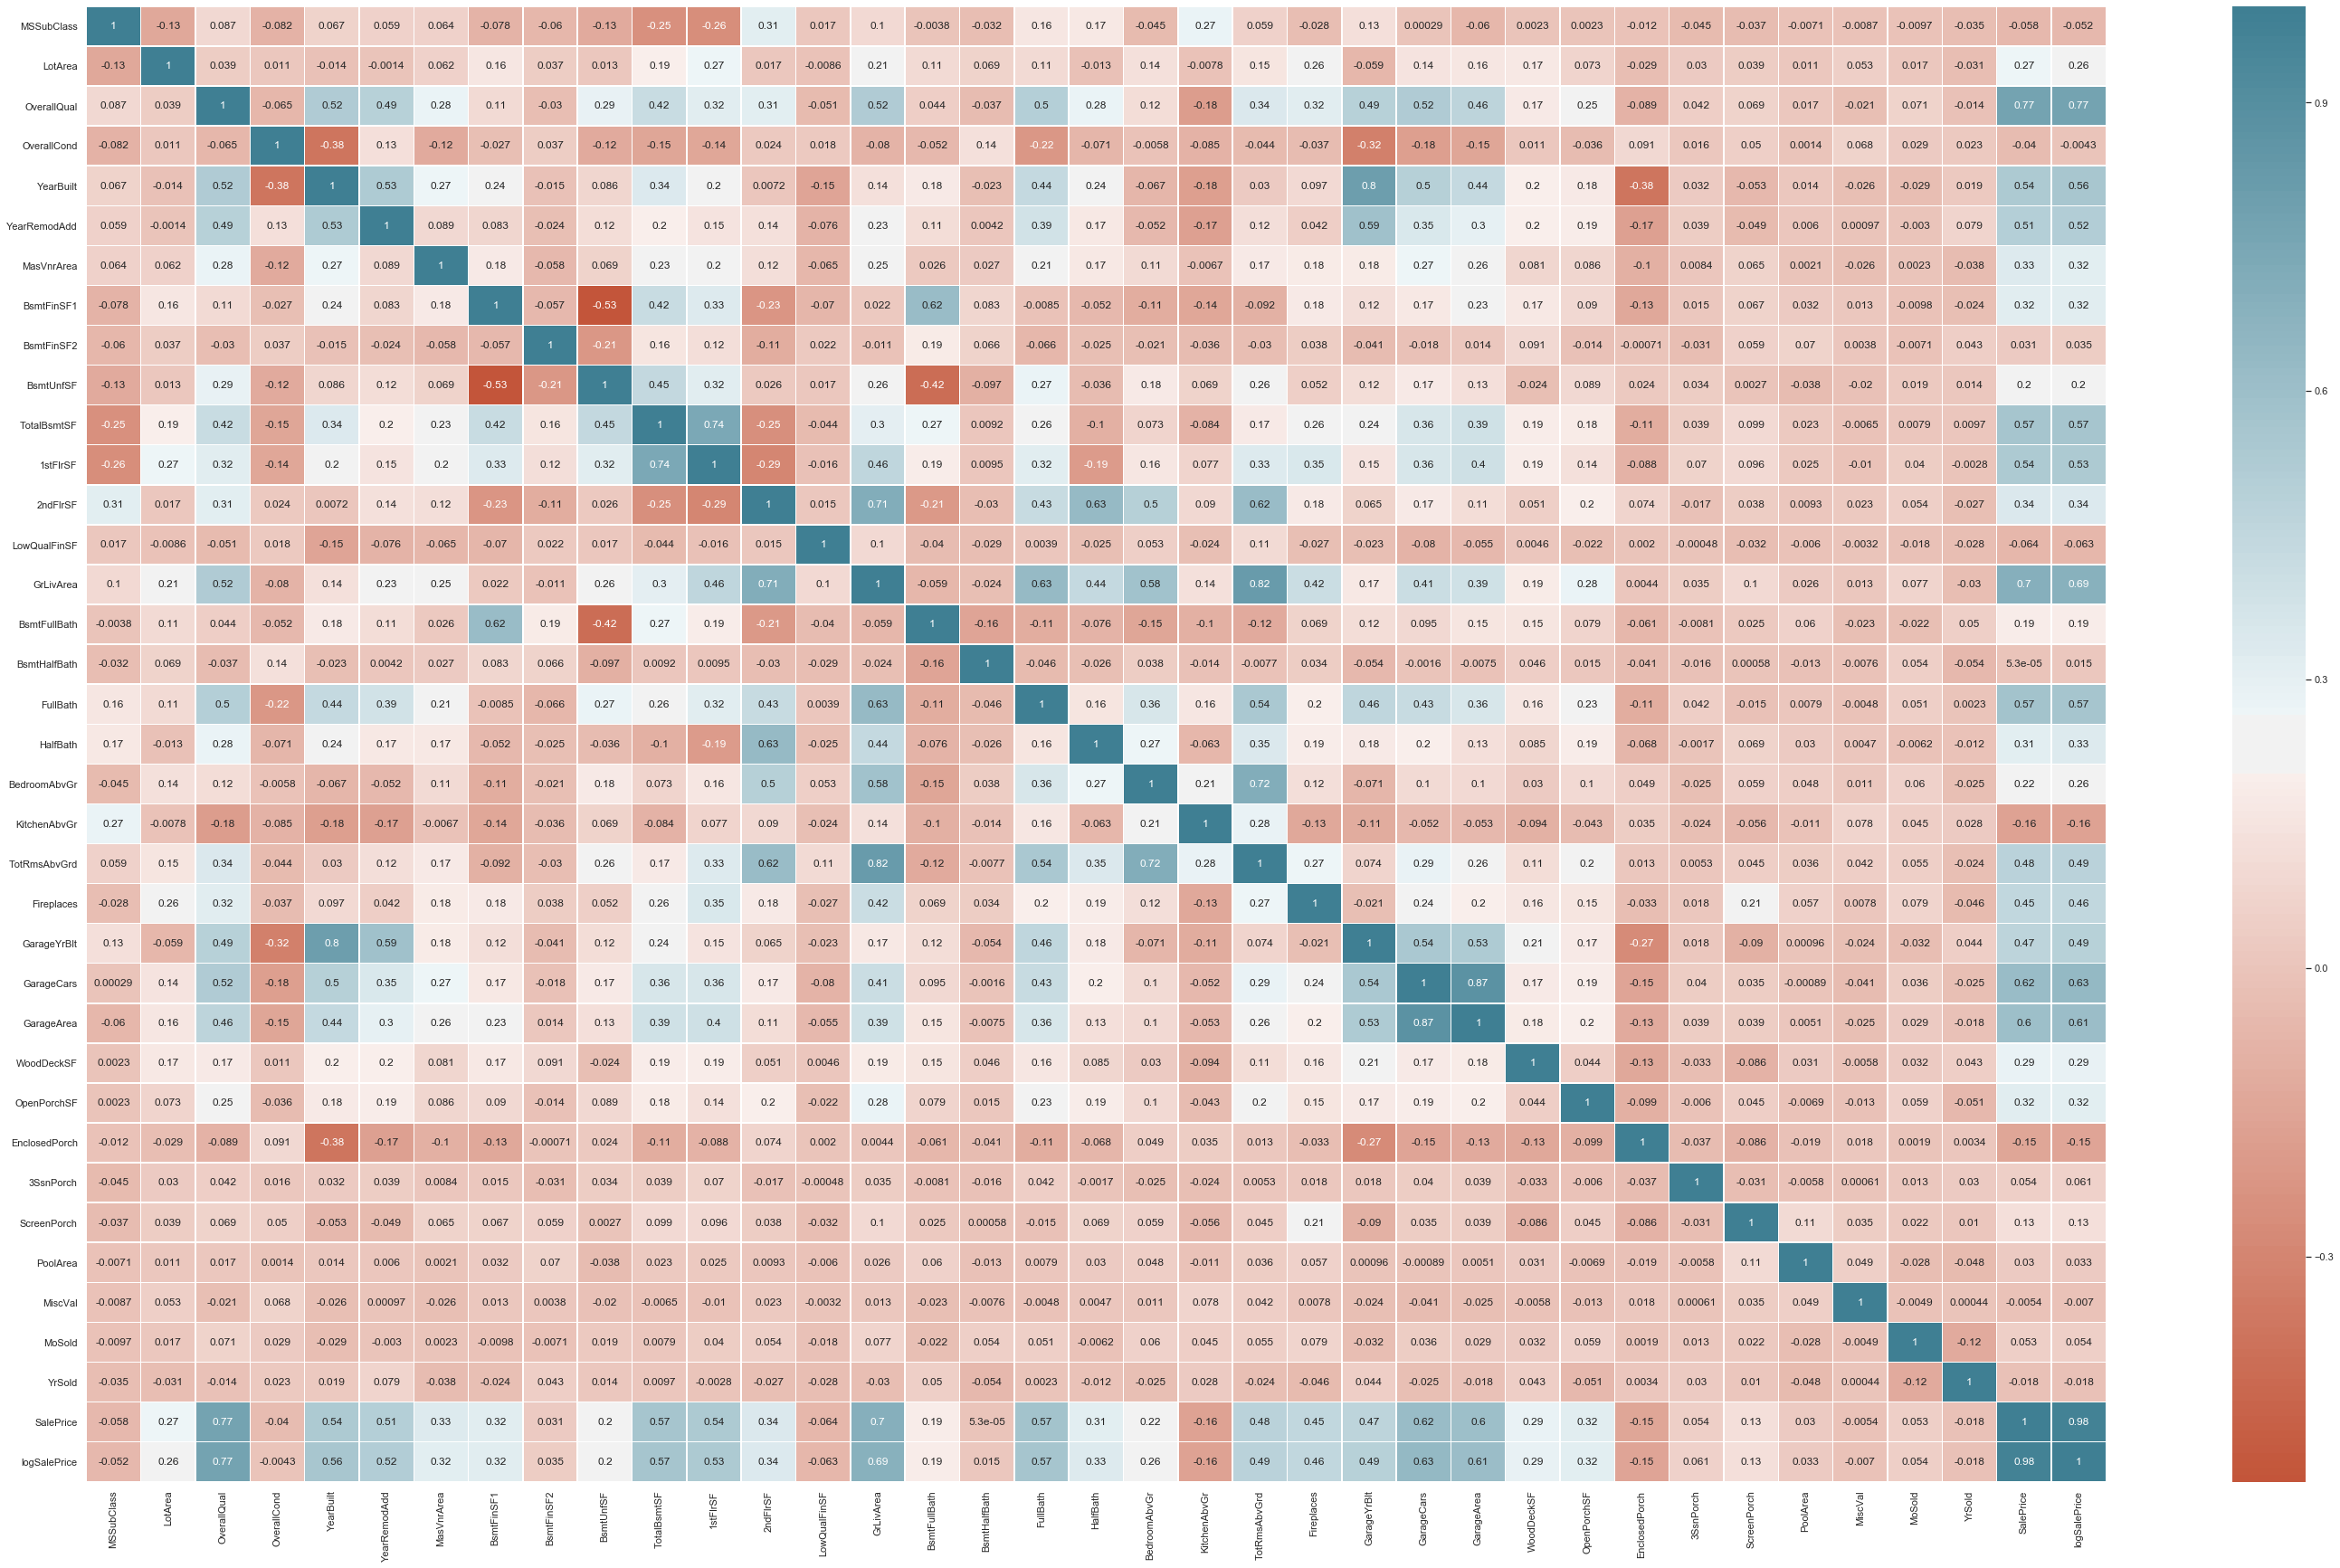

In [498]:
#Adding another version of heatmap

corr = numeric_data.corr()
fig, ax = plt.subplots(figsize=(50,30))         
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap = sns.diverging_palette(20, 220, n=200),
            annot=True,
            linewidth=0.5,
            ax=ax)

plt.savefig('House Correlation', bbox_inches='tight')

In [499]:
numeric_data.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'logSalePrice'],
      dtype='object')

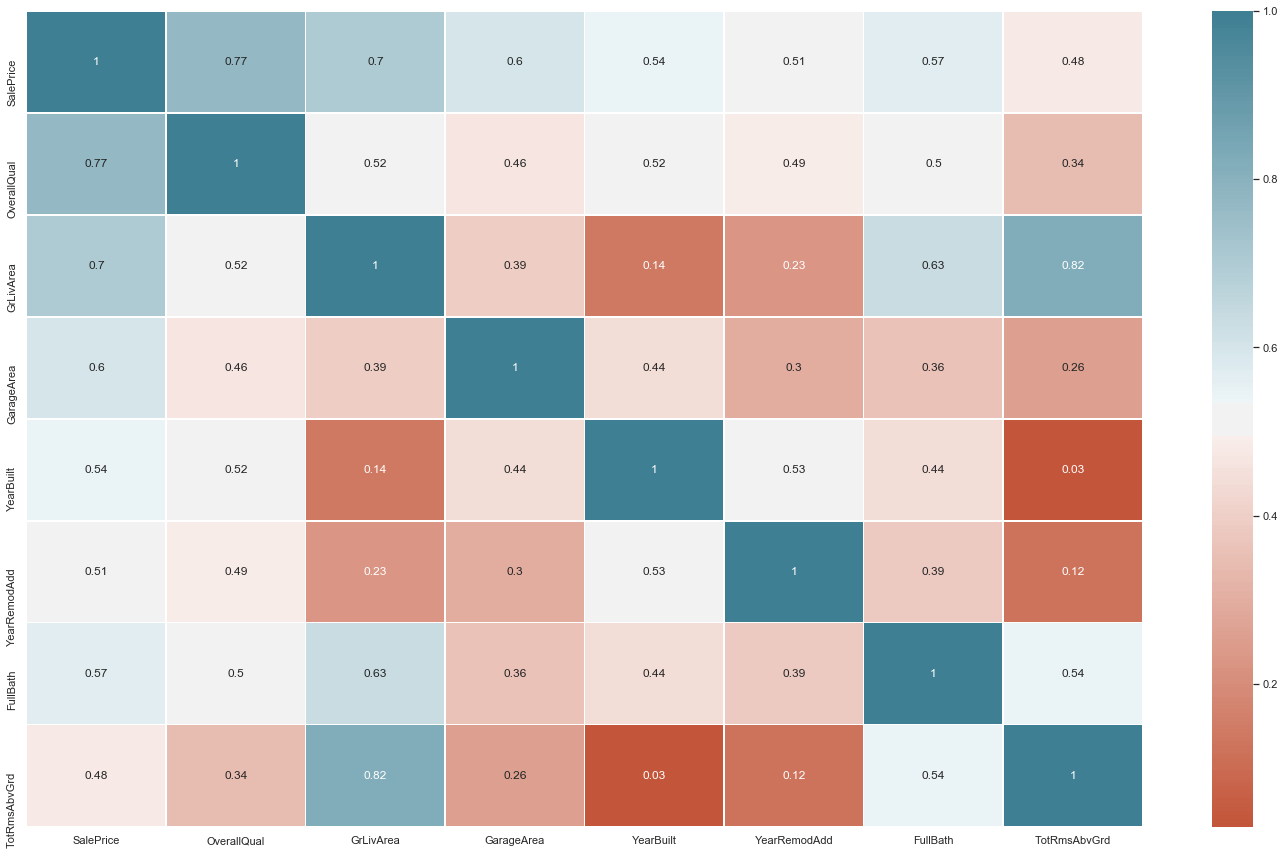

In [500]:
#selecting variables to create a zoomed/better heatmap.
Index = numeric_data[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea',
       'YearBuilt', 'YearRemodAdd', 'FullBath', 'TotRmsAbvGrd']]
zoomcorr = Index.corr()
fig, ax = plt.subplots(figsize=(25,15))         
sns.heatmap(zoomcorr,
            xticklabels=zoomcorr.columns,
            yticklabels=zoomcorr.columns,
            cmap = sns.diverging_palette(20, 220, n=200),
            annot=True,
            linewidth=0.5,
            ax=ax)


In [501]:
numeric_data.dtypes

MSSubClass         int64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
logSalePrice     float64
dtype: object

In [502]:
housing['Bathrooms'] = housing['BsmtFullBath'] + housing['BsmtHalfBath'] + housing['FullBath'] + housing['HalfBath'] 

C:\Users\bubuj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [503]:
#print the strongest positive and negative correlated variables with Sale Price
print(housing.corr()['SalePrice'].sort_values(ascending = False)[:15])
print ('----------------------')
print(housing.corr()['SalePrice'].sort_values(ascending = True)[:10])

SalePrice       1.000000
logSalePrice    0.976273
OverallQual     0.770170
GrLivArea       0.700061
Bathrooms       0.633415
GarageCars      0.616976
GarageArea      0.600705
FullBath        0.572694
TotalBsmtSF     0.567912
YearBuilt       0.539350
1stFlrSF        0.538644
YearRemodAdd    0.506138
TotRmsAbvGrd    0.480145
GarageYrBlt     0.469371
Fireplaces      0.454563
Name: SalePrice, dtype: float64
----------------------
KitchenAbvGr    -0.159170
EnclosedPorch   -0.146315
LowQualFinSF    -0.064083
MSSubClass      -0.058204
OverallCond     -0.040298
Id              -0.027204
YrSold          -0.017820
MiscVal         -0.005409
BsmtHalfBath     0.000053
PoolArea         0.029923
Name: SalePrice, dtype: float64


C:\Users\bubuj\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


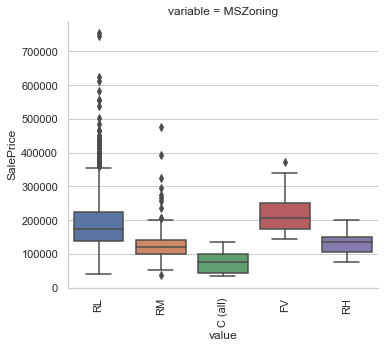

In [504]:
p = pd.melt(rawdata, id_vars='SalePrice', value_vars='MSZoning')
g = sns.FacetGrid (p, col='variable', col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, 'value','SalePrice')
g

C:\Users\bubuj\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


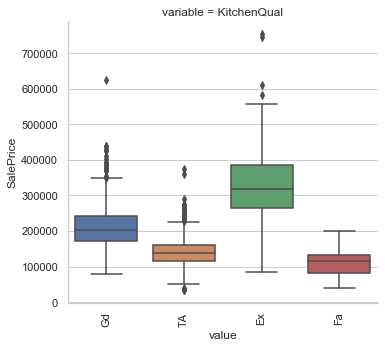

In [505]:
p = pd.melt(rawdata, id_vars='SalePrice', value_vars='KitchenQual')
g = sns.FacetGrid (p, col='variable', col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, 'value','SalePrice')
g

C:\Users\bubuj\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


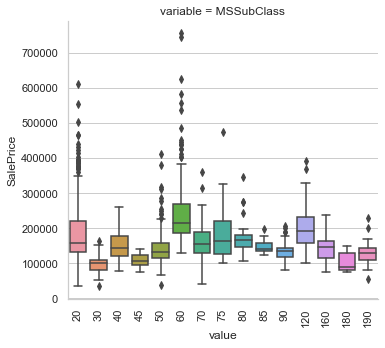

In [506]:
p = pd.melt(rawdata, id_vars='SalePrice', value_vars='MSSubClass')
g = sns.FacetGrid (p, col='variable', col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, 'value','SalePrice')
g

C:\Users\bubuj\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


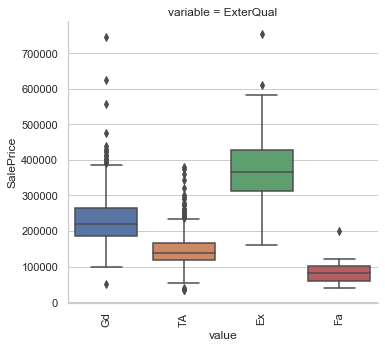

In [507]:
p = pd.melt(rawdata, id_vars='SalePrice', value_vars='ExterQual')
g = sns.FacetGrid (p, col='variable', col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, 'value','SalePrice')
g

Pearsons correlation: 0.824


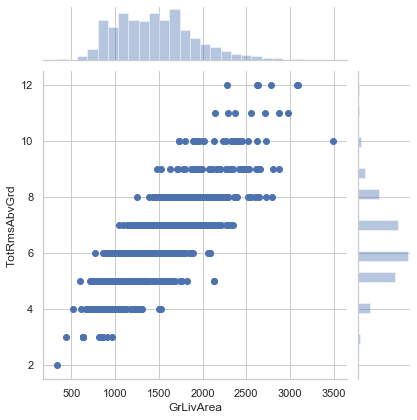

In [508]:
#assess correlation between GrLivArea and TotRmsAbvGrd    
sns.jointplot(x=housing['GrLivArea'], y=housing['TotRmsAbvGrd'])
corr, _ = pearsonr(housing['GrLivArea'], housing['TotRmsAbvGrd'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.303


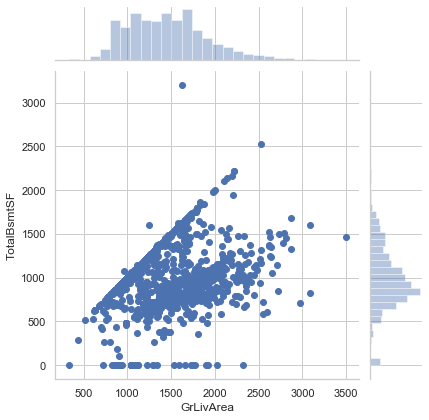

In [509]:
#assess correlation between GrLivArea and TotalBsmtSF
sns.jointplot(x=housing['GrLivArea'], y=housing['TotalBsmtSF'])
corr, _ = pearsonr(housing['GrLivArea'], housing['TotalBsmtSF'])
print('Pearsons correlation: %.3f' % corr)

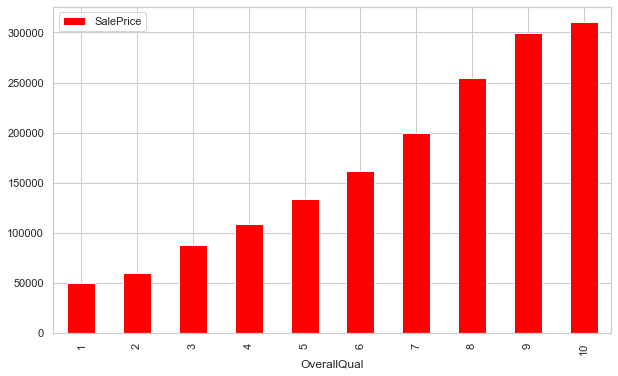

In [510]:
#Strongest correlated variable is OverallQual. let's check the mean price per quality.
pivot = housing.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)
pivot.plot(kind='bar', color='red')

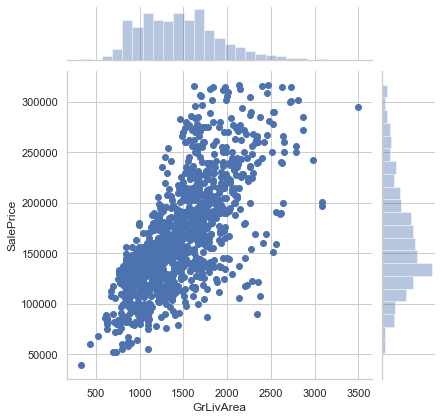

In [511]:
#Second strongest correlated variable is GrLivArea. Let's plot its relationship to the Sale Price
sns.jointplot(x=housing['GrLivArea'], y=housing['SalePrice'])

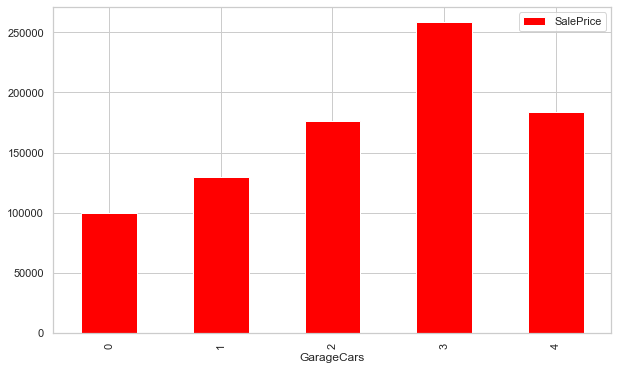

In [512]:
#For GarageCars variable, let's check the mean price as the number of carspots increase.
pivot = housing.pivot_table(index='GarageCars', values='SalePrice', aggfunc=np.median)
pivot.plot(kind='bar', color='red')

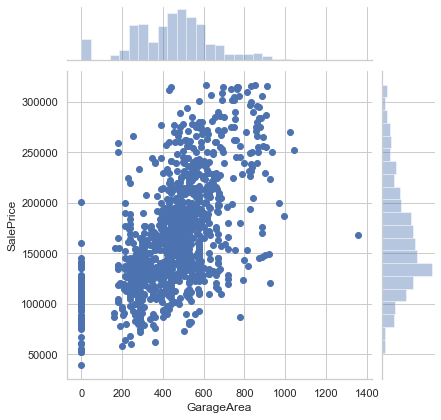

In [513]:
#How about by Garage Area?
sns.jointplot(x=housing['GarageArea'], y=housing['SalePrice'])

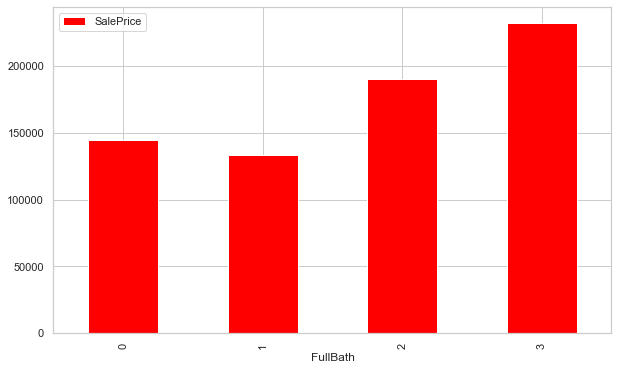

In [514]:
#assess the FullBath variable
housing['FullBath'].unique()
pivot = housing.pivot_table(index='FullBath', values='SalePrice', aggfunc=np.median)
pivot.plot(kind='bar', color='red')

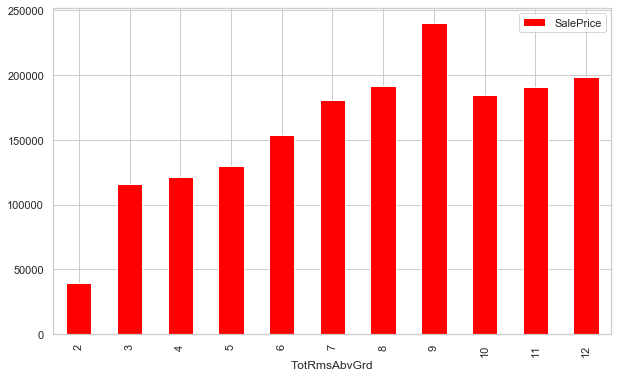

In [515]:
#assess the nubmer of rooms above grade
housing['TotRmsAbvGrd'].unique()
pivot = housing.pivot_table(index='TotRmsAbvGrd', values='SalePrice', aggfunc=np.median)
pivot.plot(kind='bar', color='red')

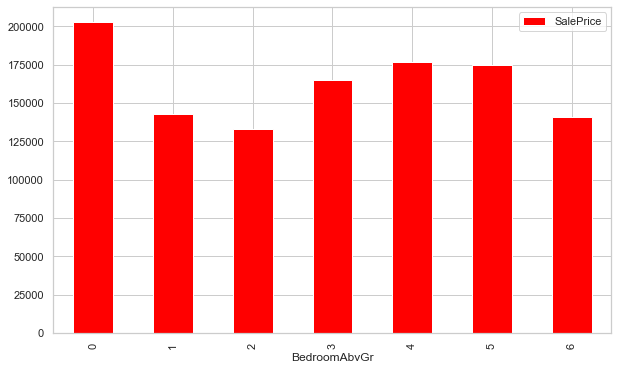

In [516]:
#assess the nubmer of rooms above grade
housing['BedroomAbvGr'].unique()
pivot = housing.pivot_table(index='BedroomAbvGr', values='SalePrice', aggfunc=np.median)
pivot.plot(kind='bar', color='red')

In [517]:
A = housing[housing['TotRmsAbvGrd'] > 8].filter(items = ['TotRmsAbvGrd','BldgType','MSSubClass','FullBath'])
A['BldgType'].value_counts()

1Fam      69
Duplex    10
2fmCon     7
TwnhsE     1
Name: BldgType, dtype: int64

C:\Users\bubuj\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\bubuj\Anaconda3\lib\site-packages\scipy\stats\stats.py:2959: RuntimeWarning: invalid value encountered in double_scalars
  msb = ssbn / dfbn
C:\Users\bubuj\Anaconda3\lib\site-packages\scipy\stats\stats.py:2951: RuntimeWarning: invalid value encountered in double_scalars
  ssbn += _square_of_sums(a - offset) / len(a)


<module 'matplotlib.pyplot' from 'C:\\Users\\bubuj\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

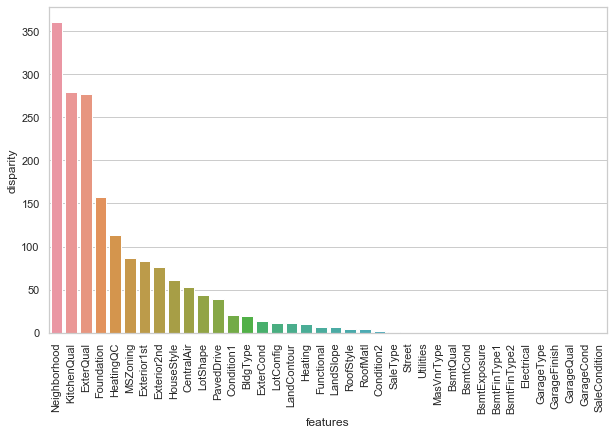

In [518]:
#Use ANOVA to see how categorical variables influence the Hous Price
cat = [f for f in housing.columns if housing.dtypes[f] == 'object']
def anova(frame):
    anv = pd.DataFrame()
    anv['features'] = cat
    pvals = []
    for c in cat:
           samples = []
           for cls in frame[c].unique():
                  s = frame[frame[c] == cls]['SalePrice'].values
                  samples.append(s)
           pval = stats.f_oneway(*samples)[1]
           pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

cat_data['SalePrice'] = housing.SalePrice.values
k = anova(cat_data) 
k['disparity'] = np.log(1./k['pval'].values) 
sns.barplot(data=k, x = 'features', y='disparity') 
plt.xticks(rotation=90) 
plt

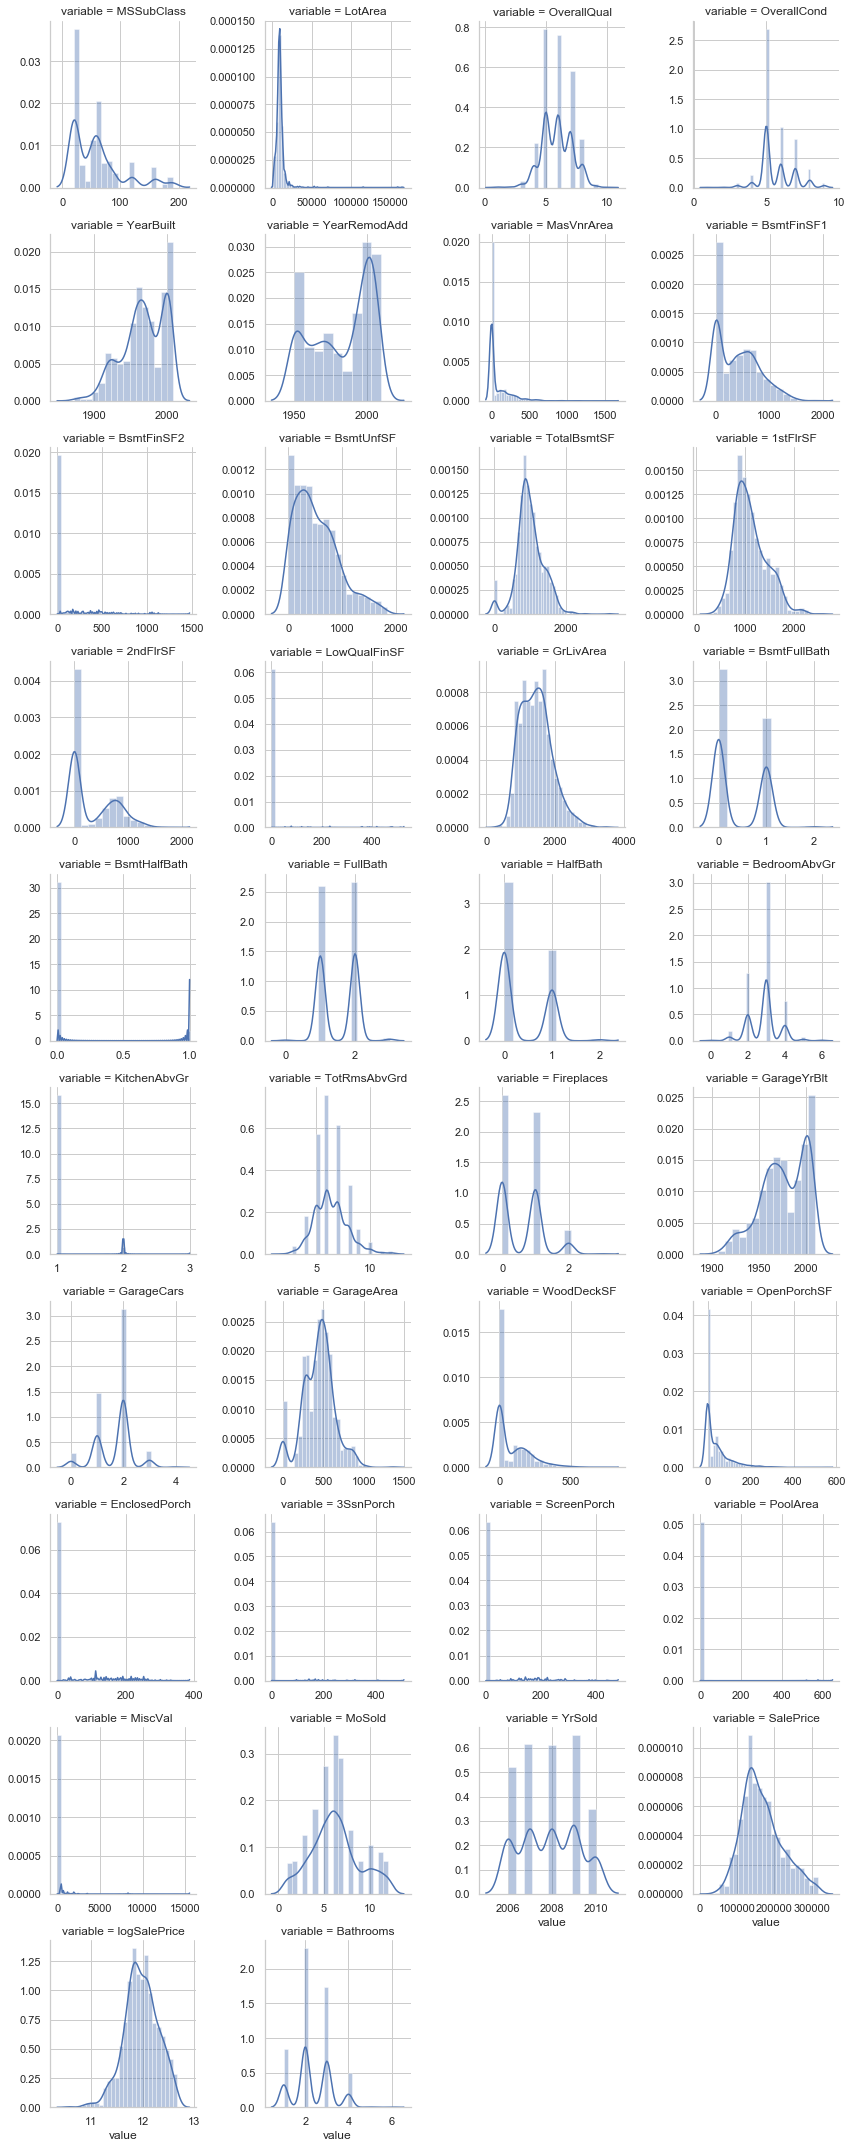

In [519]:
#create numeric plots
num = [f for f in housing.columns if housing.dtypes[f] != 'object']
num.remove('Id')
nd = pd.melt(housing, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

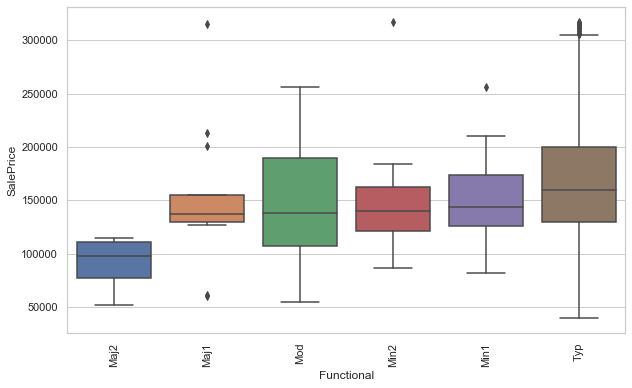

In [520]:
sorted_nb = housing.groupby(['Functional'])['SalePrice'].median().sort_values()
sns.boxplot(x=housing['Functional'], y=housing['SalePrice'], order=list(sorted_nb.index))
plt.xticks(rotation=90)

plt.savefig('Functional vs Sale Price', bbox_inches='tight')

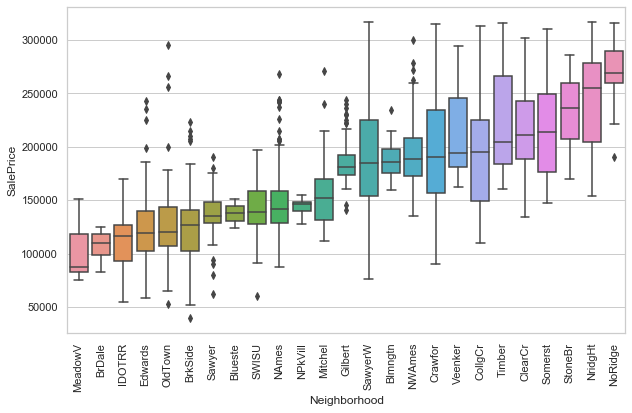

In [521]:
sorted_nb = housing.groupby(['Neighborhood'])['SalePrice'].median().sort_values()
sns.boxplot(x=housing['Neighborhood'], y=housing['SalePrice'], order=list(sorted_nb.index))
plt.xticks(rotation=90)

plt.savefig('Neighborhood vs Sale Price', bbox_inches='tight')

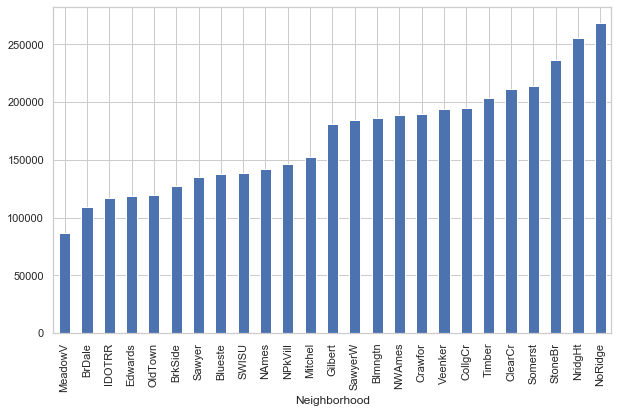

In [522]:
housing['SalePrice'].groupby(housing['Neighborhood']).median().sort_values().plot(kind='bar')

In [523]:
housing['Neighborhood'].unique()

array(['CollgCr', 'Veenker', 'NoRidge', 'Mitchel', 'Somerst', 'NWAmes',
       'BrkSide', 'Sawyer', 'NAmes', 'SawyerW', 'IDOTRR', 'MeadowV',
       'NridgHt', 'Timber', 'Gilbert', 'OldTown', 'ClearCr', 'Crawfor',
       'Edwards', 'NPkVill', 'StoneBr', 'BrDale', 'Blmngtn', 'SWISU',
       'Blueste'], dtype=object)

In [524]:
dummies = pd.get_dummies(housing['MSZoning'],prefix = 'Zoning')
housing = housing.join(dummies)

In [525]:
dummies.head(1)

,Zoning_FV,Zoning_RH,Zoning_RL,Zoning_RM
0,0,0,1,0


In [526]:
Neighborhoodlist = housing['Neighborhood'].unique().tolist()

In [527]:
median_dict = {}

for name in Neighborhoodlist:
    
    n_median = housing[housing['Neighborhood'] == name]['SalePrice'].median()
    
    if n_median > 230000:
        median_dict[name] = 'High'
    elif n_median < 160000:
        median_dict[name] = 'Low'
    else:
         median_dict[name] = 'Med'
        
housing['DUMneighborhood'] = housing['Neighborhood'].map(median_dict)

In [528]:
dummies = pd.get_dummies(housing['DUMneighborhood'],prefix = 'neighborhood')
housing = housing.join(dummies)

## 4. Run model and evaluation

#### (a) Linear Regression where dependent variable = SalePrice (nominal)

In [529]:
# set target variable for linear regression
y = housing['SalePrice']

In [530]:
# set predictor variables
X = housing[['Zoning_FV','Zoning_RH','Zoning_RL','Zoning_RM','OverallQual','GrLivArea','Bathrooms','GarageArea']]

In [531]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=22)

In [532]:
# Create a model for Linear Regression
linreg = LinearRegression()

# Fit the model with the Training data
linreg.fit(X_train,y_train)

# Calculate the score (R^2 for Regression) for Training Data
print('Rsquared for training data:', round(linreg.score(X_train, y_train),2))

# Calculate the score (R^2 for Regression) for Testing Data
print('Rsquared for testing data:', round(linreg.score(X_test, y_test),5))

Rsquared for training data: 0.8
Rsquared for testing data: 0.81385


In [533]:
intercept = linreg.intercept_
print('intercept: ', round(intercept,5))
coeff = pd.DataFrame(linreg.coef_, X.columns, columns=['Coefficient'])  
coeff

intercept:  -49303.47513


,Coefficient
Zoning_FV,6223.387294
Zoning_RH,-12244.058011
Zoning_RL,13751.647917
Zoning_RM,-7730.977200
OverallQual,18928.851464
GrLivArea,34.862880
Bathrooms,7668.825127
GarageArea,57.838218


In [534]:
#make predictions on the test data
y_pred = linreg.predict(X_test)

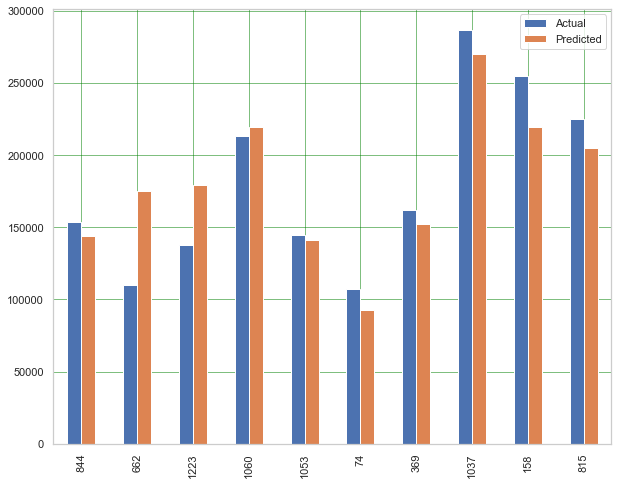

In [535]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(10)
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [536]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 18366.402349776807
Mean Squared Error: 573244717.3116401
Root Mean Squared Error: 23942.529467699107


#### (b) Linear Regression where dependent variable = logSalePrice (log-transformed)

In [539]:
# set target variable for linear regression
y = housing['logSalePrice']

In [540]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=22)

In [541]:
# Create a model for Linear Regression
linreg = LinearRegression()

# Fit the model with the Training data
linreg.fit(X_train,y_train)

# Calculate the score (R^2 for Regression) for Training Data
print('Rsquared for training data:', round(linreg.score(X_train, y_train),2))

# Calculate the score (R^2 for Regression) for Testing Data
print('Rsquared for testing data:', round(linreg.score(X_test, y_test),5))

Rsquared for training data: 0.82
Rsquared for testing data: 0.80491


In [542]:
intercept = linreg.intercept_
print('intercept: ', round(intercept,5))
coeff = pd.DataFrame(linreg.coef_, X.columns, columns=['Coefficient'])  
coeff

intercept:  10.64164


,Coefficient
Zoning_FV,0.053717
Zoning_RH,-0.088836
Zoning_RL,0.097240
Zoning_RM,-0.062120
OverallQual,0.116458
GrLivArea,0.000197
Bathrooms,0.051693
GarageArea,0.000375


In [543]:
#make predictions on the test data
y_pred = linreg.predict(X_test)

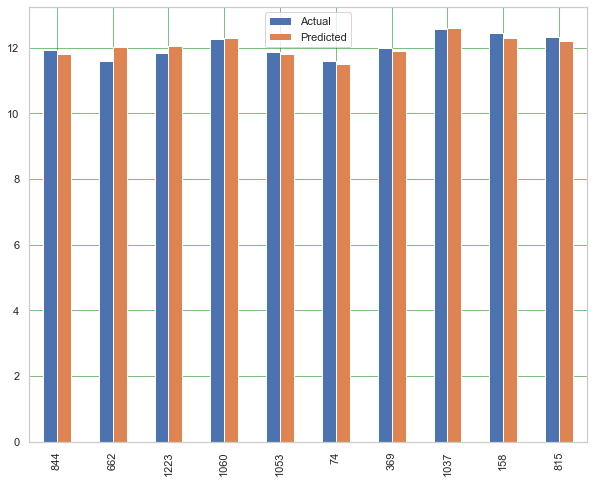

In [544]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(10)
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [545]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.1090029988990098
Mean Squared Error: 0.020855971686120817
Root Mean Squared Error: 0.14441596755941088
